In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.3/614.3 kB 7.9 MB/s eta 0:00:00


In [4]:
from ultralytics import RTDETR, YOLO
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import os
from os import listdir

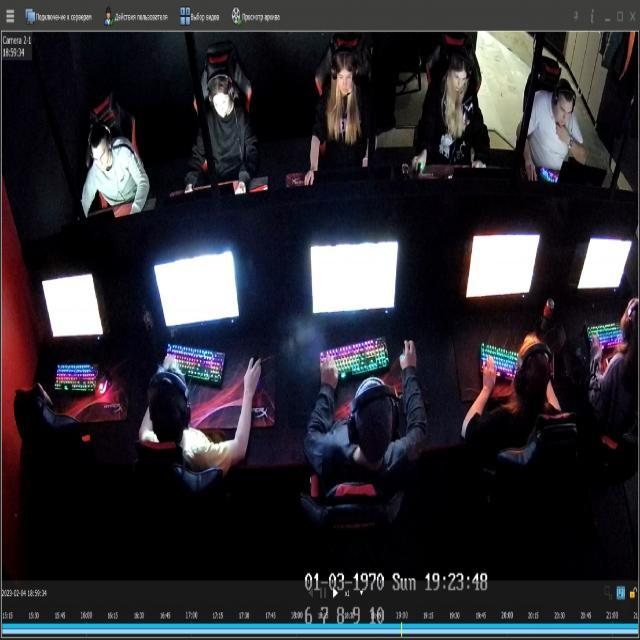

In [8]:
img = cv2.imread("./datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg")
cv2_imshow(img)

# RT-DETR

In [ ]:
model = RTDETR('rtdetr-l.pt')

In [6]:
results = model.train(data='datasets/clean-workplace-2/data.yaml', epochs=30, imgsz=640)

Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=datasets/clean-workplace-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

In [18]:
results.results_dict

{'metrics/precision(B)': 0.9447558836146839,
 'metrics/recall(B)': 0.8950397795554165,
 'metrics/mAP50(B)': 0.9175129941734559,
 'metrics/mAP50-95(B)': 0.6099535493537177,
 'fitness': 0.6407094938356915}

In [9]:
inference_results = model('./datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg')


image 1/1 /content/drive/MyDrive/datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg: 640x640 1 clean, 4 persons, 95.3ms
Speed: 6.0ms preprocess, 95.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


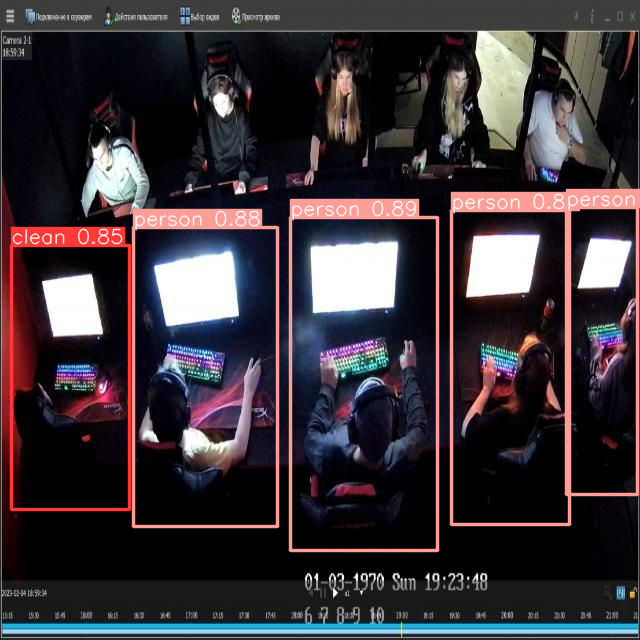

In [10]:
for r in inference_results:
    im_array = r.plot()
    cv2_imshow(im_array)

In [20]:
def show_test_results():
    folder_dir = "./datasets/clean-workplace-2/test/images"
    max_img_count = 10
    imgs = []

    counter = 0
    for image in os.listdir(folder_dir):

        if (image.endswith(".jpg") or image.endswith(".png")):
            imgs.append(folder_dir + '/' + image)
            counter += 1
            if counter >= max_img_count:
                break

    inference_results = model(imgs)

    for r in inference_results:
        im_array = r.plot()
        cv2_imshow(im_array)

In [16]:
show_test_results()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
model = RTDETR("/content/drive/MyDrive/runs/detect/train2/weights/best.pt")

In [6]:
metrics = model.val()

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 498 layers, 31989905 parameters, 0 gradients
100%|██████████| 755k/755k [00:00<00:00, 42.0MB/s]
val: Scanning /content/drive/MyDrive/datasets/clean-workplace-2/valid/labels.cache... 179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 179/179 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]
                   all        179        788      0.946      0.895      0.917       0.61
                 clean        179        247      0.927      0.931      0.953      0.626
                person        179        460      0.958      0.938      0.946      0.613
               unclean        179         81      0.953      0.815      0.852      0.589
Speed: 3.0ms preprocess, 37.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val2


# YOLO

In [5]:
model = YOLO("yolov8l.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

In [6]:
results = model.train(data='datasets/clean-workplace-2/data.yaml', epochs=30, imgsz=640)

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=datasets/clean-workplace-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

In [11]:
inference_results = model('./datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg')


image 1/1 /content/drive/MyDrive/datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg: 640x640 1 clean, 4 persons, 72.1ms
Speed: 2.2ms preprocess, 72.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


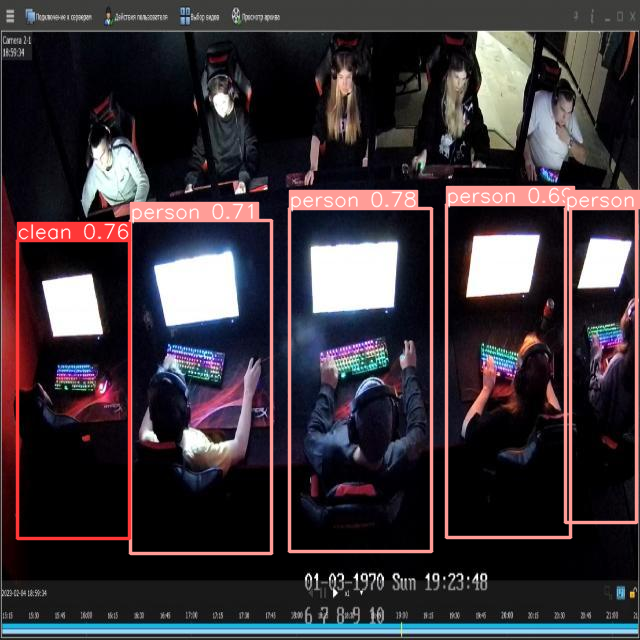

In [12]:
for r in inference_results:
    im_array = r.plot()
    cv2_imshow(im_array)

In [10]:
show_test_results()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
model = YOLO("/content/drive/MyDrive/runs/detect/train3/weights/last.pt")

In [10]:
results = model.train(data='datasets/clean-workplace-2/data.yaml', epochs=70, imgsz=640)

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/runs/detect/train3/weights/last.pt, data=datasets/clean-workplace-2/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

In [11]:
metrics = model.val()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43608921 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/datasets/clean-workplace-2/valid/labels.cache... 179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 179/179 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:14<00:00,  1.18s/it]
                   all        179        788      0.914      0.815      0.911       0.58
                 clean        179        247      0.944      0.866      0.967      0.613
                person        179        460      0.963      0.898      0.973      0.625
               unclean        179         81      0.834      0.679      0.793      0.503
Speed: 8.2ms preprocess, 38.5ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/drive/MyDrive/datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg: 640x640 1 clean, 4 persons, 64.7ms
Speed: 4.3ms preprocess, 64.7ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 640)


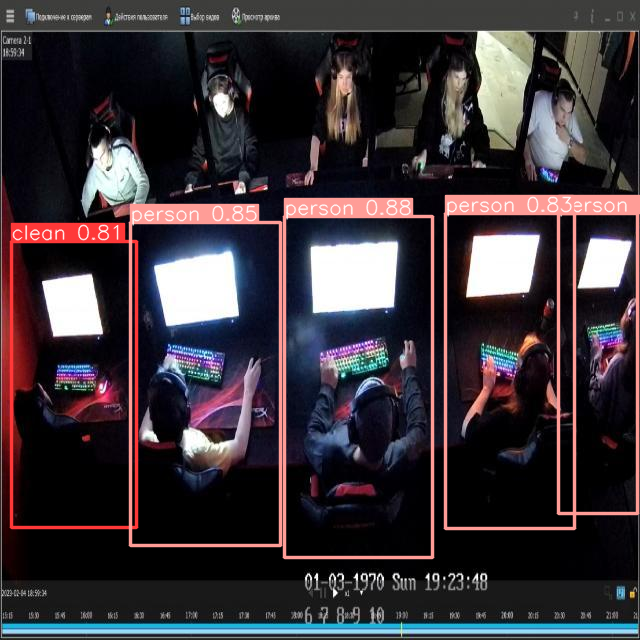

In [18]:
inference_results = model('./datasets/clean-workplace-2/test/images/iknnt55mdDw_png_jpg.rf.be1b65b4d9eb557f420a7087b85ecf6e.jpg')
for r in inference_results:
    im_array = r.plot()
    cv2_imshow(im_array)

In [21]:
show_test_results()

Output hidden; open in https://colab.research.google.com to view.

# Сравнение результатов

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
rtdetr_results = pd.read_csv('runs/detect/train2/results.csv')
yolo_results = pd.read_csv('runs/detect/train4/results.csv')

In [12]:
yolo_results.iloc[-5]

                  epoch    66.000000
         train/box_loss     1.144400
         train/cls_loss     0.625160
         train/dfl_loss     1.723100
   metrics/precision(B)     0.914120
      metrics/recall(B)     0.814430
       metrics/mAP50(B)     0.911250
    metrics/mAP50-95(B)     0.581120
           val/box_loss     1.305500
           val/cls_loss     0.619920
           val/dfl_loss     1.968900
                 lr/pg0     0.000136
                 lr/pg1     0.000136
                 lr/pg2     0.000136
Name: 65, dtype: float64

In [13]:
rtdetr_results.iloc[-1]

                  epoch    30.000000
        train/giou_loss     0.276040
         train/cls_loss     0.371610
          train/l1_loss     0.248940
   metrics/precision(B)     0.943450
      metrics/recall(B)     0.907610
       metrics/mAP50(B)     0.927360
    metrics/mAP50-95(B)     0.606400
          val/giou_loss     0.369570
           val/cls_loss     0.457520
            val/l1_loss     0.362890
                 lr/pg0     0.000109
                 lr/pg1     0.000109
                 lr/pg2     0.000109
Name: 29, dtype: float64

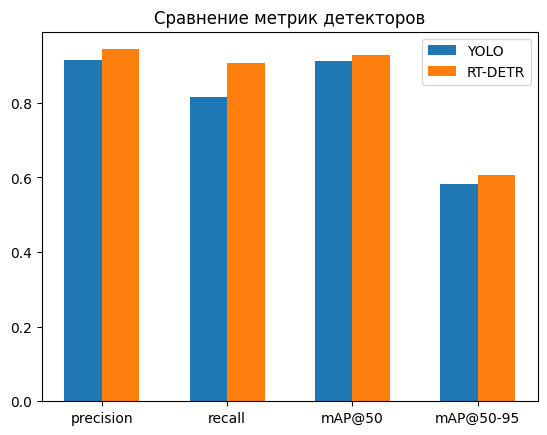

In [14]:
cat_par = ["precision", "recall", "mAP@50", "mAP@50-95"]
g1 = yolo_results.iloc[-5][4:8].tolist()
g2 = rtdetr_results.iloc[-1][4:8].tolist()
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='YOLO')
rects2 = ax.bar(x + width/2, g2, width, label='RT-DETR')
ax.set_title('Сравнение метрик детекторов')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()